# **Lab 8 - Equazioni Differenziali Ordinarie II**

## Metodi di Runge-Kutta (RK)

I metodi numerici utilizzati per risolvere il generico problema di Cauchy:

$$
\begin{cases}
y'(t) = f(t,y), \quad t_0<t\leq t_\max, \\
y(t_0) = y_0,
\end{cases}
$$

si basano sulla seguente strategia:

1. Stabilire un passo di avanzamento temporale $h$,
2. Suddividere l'intervallo temporale $[t_0,t_\max]$ in un numero $N_h$ di sottointervalli
$$ N_h = \frac{t_\max-t_0}{h} $$
di eguale ampiezza $h$,
3. Per ogni istante temporale discreto $t_n$, con $t_0 < t_n < t_\max$, si calcola il valore incognito $u_n$ che approssima la soluzione $y_n=y(t_n)$.

L'insieme dei valori $\{u_0 = y_0, \ u_1,\dots,u_{N_h}\}$ rappresenta la soluzione numerica del problema di Cauchy.

Il metodo di Runge-Kutta è un metodo a un passo, ma rispetto a Eulero in avanti consente di raggiungere un ordine di accuratezza più elevato. Ad ogni passo, la soluzione numerica è calcolata secondo la seguente formula:

$$
\begin{cases}
u_0     = y_0, \\
u_{n+1} = u_n +\dfrac{h}{6}(K_1 +2K_2 +2K_3 +K_4), \quad n=0,\dots,N_h,
\end{cases}
$$

dove

$$
\begin{aligned}
K_1 & = f(t_n,u_n),\\
K_2 & = f\left(t_n+\dfrac{h}{2},u_n+\dfrac{h}{2}K_1\right), \\
K_3 & = f\left( t_n + \dfrac{h}{2},u_n+\dfrac{h}{2}K_2 \right), \\
K_4 & = f(t_{n+1},u_n+hK_3).
\end{aligned}
$$

In particolare, questo è un metodo esplicito di ordine 4 rispetto ad $h$ e, ad ogni passo temporale, richiede quattro valutazioni di $f$. Una variante di questo metodo, che utilizza anche un passo di integrazione variabile, è implementata nella function $\texttt{RK45}
$ della libreria Python $\texttt{scipy.integrate}$.

## Esplorazione numerica

Si consideri il problema di Cauchy

$$
\begin{cases}
y'(t) = -ty(t), \quad t_0<t\leq t_\max, \\
y(t_0) = 1,
\end{cases}
$$

con $t_0 = 0$ e $t_\text{max} = 5$.

<mark>**Esercizio 1.1**</mark></br>

Si risolva il problema di Cauchy con il metodo di Eulero in avanti,utilizzando la function $\verb|eulero_avanti|$ presente nello script $\verb|utilities_ODE2.py|$, con passo $h=0.01$ e si calcoli l'errore assoluto

$$
e_h = \max_{n=1,\dots,N_h} |y(t_n)-u_n|.
$$

*NB: a differenza della scorsa implementazione, la function fornita, "eulero_avanti", si aspetta che il dato iniziale $y_0$ sia un vettore di lunghezza $d$, dove $d$ è la dimensione del problema (qui, $d=1$). Eventualmente, aiutatevi anche con l'help di Python.*

In [1]:
import numpy as np
f = lambda t, y : -t*y
y0 = 1
t0 = 0
t_max = 5

yex = lambda t : np.exp(-t**2/2)

In [2]:
from utilities_ODE2 import eulero_avanti
help(eulero_avanti)

Help on function eulero_avanti in module utilities_ODE2:

eulero_avanti(f, t0, t_max, y0, h)
    Risolve il problema di Cauchy
    
    y'   = f(t,y)
    y(0) = y0
    
    utilizzando il metodo di Eulero in avanti (esplicito):
    u^(n+1) = u^n + h*f^n
    
    L'equazione differenziale ordinaria può essere in generale vettoriale
    (y=f(t,y) in R^d)
    per d=1 si ottiene il caso scalare.
    
    Input:
          f: lambda function che descrive il problema di Cauchy.
              Riceve in input due argomenti: f=f(t,y), con y vettore di lunghezza d
          t0, t_max: estremi dell'intervallo temporale di soluzione
          y0: dato iniziale del problema di Cauchy (vettore di lunghezza d)
          h: ampiezza de passo di discretizzazione temporale
    ATTENZIONE: controllare che l'output di f e il dato y0 siano vettori della stessa lunghezza!
    
    Output:
          t_h = vettore degli istanti in cui viene calcolata la soluzione discreta (lunghezza N)
          u_h = soluzion

In [3]:
h = 0.01
tEA, yEA = eulero_avanti(f, t0, t_max, [y0], h)

In [4]:
yEA.shape

(501, 1)

In [5]:
errEA = np.max(np.abs(yEA[:, 0] - yex(tEA)))
nstepsEA = len(tEA)-1

print("Errore globale EA:\t%.2e" % errEA)
print("Passi effettuati:\t%d" % nstepsEA)

Errore globale EA:	2.31e-03
Passi effettuati:	500


<mark>**Esercizio 1.2**</mark></br>

Si risolva ora il problema con il meotodo di Runge-Kutta. Per farlo, si sfrutti la function
$\verb|RK23|
$
della libreria Python $\verb|scipy.integrate|$ e si calcoli l'errore assoluto. (Si fissino tolleranza relativa ed assoluta a $10^{-8}$). Si confrontino quindi gli errori assoluti dei due metodi (RK23 ed EA) rispetto al numero di istanti temporali utilizzati.
</br></br>
*NB: la function RK23 implementa un metodo adattivo basato su due metodi di Runge-Kutta: uno di ordine 3 (per effettuare il passo) ed uno di ordine 2 (per scegliere, ad ogni step, il nuovo passo temporale $h_n$). Inoltre, diversamente dalle implementazioni che abbiamo visto finora, questa function non simula direttamente tutta la traiettoria: invece, ci restituisce un oggetto Python che può essere evoluto in tempo chiamando il metodo $\verb|.step()|$. In sostanza, RK23 implementa l'iteratore dello schema numerico.*

*In ultimo: in ogni momento potete accedere agli attributi $\verb|.t|$
 e $\verb|.y|$ dell'iteratore per conoscere, rispettivamente, il tempo corrente $t_n$ e lo stato corrente del sistema, $y_n$.*

In [6]:
from scipy.integrate import RK23

integratore23 = RK23(f, t0, [y0], t_max, rtol=1e-8, atol=1e-8)
print(integratore23.t)
print(integratore23.y)

0
[1.]


In [7]:
tRK23 = [t0]
yRK23 = [[y0]]

while integratore23.t < t_max:
  integratore23.step()
  tRK23.append(integratore23.t)
  yRK23.append(integratore23.y)

tRK23 = np.array(tRK23)
yRK23 = np.stack(yRK23)
yRK23.shape

(383, 1)

In [8]:
errRK23 = np.max(np.abs(yRK23[:, 0] - yex(tRK23)))
nstepsRK23 = len(tRK23) - 1.0

print("Errore globale RK23:\t%.2e" % errRK23)
print("Passi effettuati:\t%d" % nstepsRK23)

Errore globale RK23:	9.46e-08
Passi effettuati:	382


Osserviamo che i due metodi hanno un numero di passi temporali confrontabili, ma che l'errore assoluto è significativamente inferiore per il metodo di RK23. Questo è dovuto sia all'ordine del metodo di Runge Kutta sia all'adattività.

<mark>**Esercizio 1.3**</mark></br>

Si ripeta l'Esercizio 1.2 utilizzando un metodo di Runge-Kutta di ordine superiore, implementato nella function $\verb|RK45|
,$ della libreria Python $\verb|scipy.integrate|$ e si calcoli l'errore assoluto. Cosa si può concludere?
</br></br>
*NB: tale function implementa un metodo adattivo basato su due metodi di Runge-Kutta: uno di ordine 5 (per effettuare il passo) ed uno di ordine 4 (per scegliere,ad ogni step, il nuovo passo temporale $h_n$). Come prima, l'output di RK45 consiste in un oggetto Python, il quale può essere evoluto in tempo chiamando il metodo $\verb|.step()|$.*



In [9]:
from scipy.integrate import RK45
integratore45 = RK45(f, t0, [y0], t_max, rtol=1e-8, atol=1e-8)

tRK45 = [t0]
yRK45 = [[y0]]

while integratore45.t < t_max:
  integratore45.step()
  tRK45.append(integratore45.t)
  yRK45.append(integratore45.y)

tRK45 = np.array(tRK45)
yRK45 = np.stack(yRK45)

In [10]:
errRK45 = np.max(np.abs(yRK45[:, 0] - yex(tRK45)))
nstepsRK45 = len(tRK45) - 1.0

print("Errore globale RK45:\t%.2e" % errRK45)
print("Passi effettuati:\t%d" % nstepsRK45)

Errore globale RK45:	3.24e-09
Passi effettuati:	54


Osserviamo che il numero di passi è notevolmente diminuito rispetto al metodo RK23, poiché questo metodo è di ordine maggiore.

Possiamo concludere che le stime teoriche sono pienamente soddisfatte, in quanto il metodo di Eulero in avanti è di ordine 1, mentre i metodi adattivi abbattono notevolmente l'errore mantenendo il numero di passi relativamente basso.

<mark>**Esercizio 1.4**</mark></br>

Confrontate graficamente soluzione esatta e approssimazioni numeriche (utilizzate quelle ottenute ai punti 1.1, 1.2 ed 1.3).



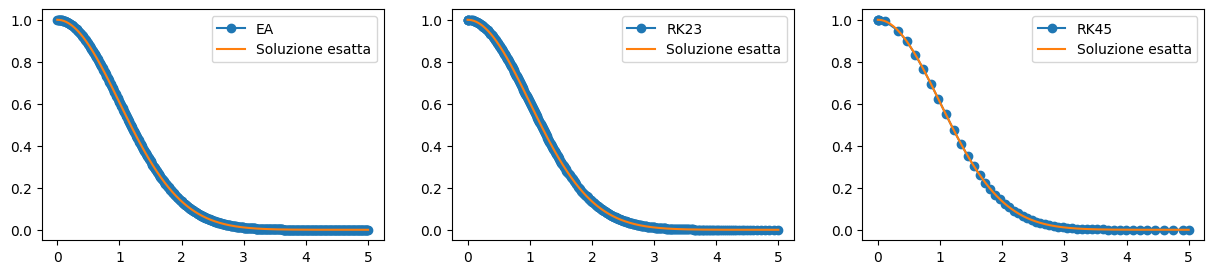

In [11]:
import matplotlib.pyplot as plt

tplot = np.linspace(t0, t_max, 1000)
plt.figure(figsize = (15, 3))
plt.subplot(1,3,1)
plt.plot(tEA, yEA[:, 0], '-o', label = 'EA')
plt.plot(tplot, yex(tplot), label = 'Soluzione esatta')
plt.legend()

plt.subplot(1,3,2)
plt.plot(tRK23, yRK23[:, 0], '-o', label = 'RK23')
plt.plot(tplot, yex(tplot), label = 'Soluzione esatta')
plt.legend()

plt.subplot(1,3,3)
plt.plot(tRK45, yRK45[:, 0], '-o', label = 'RK45')
plt.plot(tplot, yex(tplot), label = 'Soluzione esatta')
plt.legend()

plt.show()

# ODE di ordine superiore al primo

Tutto quello che abbiamo fatto finora si generalizza facilmente al contesto vettoriale, dove, in sostanza, non abbiamo più una singola quantità evolvente nel tempo, ma una collezione di $d$ variabili $\mathbf{y}(t)\in\mathbb{R}^{d}$. Ciò è molto utile anche per modellizzare fenomeni scalari la cui dinamica sia descritta da equazioni di ordine superiore: ad esempio, una ODE del secondo ordine nella variabile $x$
$$$$
$$x''(t)=f(t,x(t),x'(t))$$
$$$$
si può riscrivere come
$$$$
$$\mathbf{y}'(t)=\mathbf{f}(t,\mathbf{y}(t))$$
$$$$
avendo posto $\mathbf{y}'(t):=[x(t),\;x'(t)]^\top$ il vettore di posizione e velocità, mentre $\mathbf{f}(\mathbf{y}):=[y_{2},\;f(t, y_{1}, y_{2})]^\top.$

# Esempio numerico

Si consideri l'equazione che descrive l'oscillatore armonico smorzato e forzato data da:

$$
\begin{cases}
m \ddot x = -kx - \gamma\dot x + f_0 \cos(\Omega t), \quad t_0<t\leq t_\max, \\
\dot x(t_0) = v_0, \\
x(t_0) = x_0,
\end{cases}
$$

dove $m$ è la massa dell'oggetto attaccato alla molla, $k$ la costante elastica della molla, $\gamma$ il coefficiente di smorzamento e $f_0\cos(\Omega t)$ è un termine forzante di ampiezza $f_0$ e frequenza $\Omega$.
La pulsazione dell'oscillazione è definita come

$$
\omega = \sqrt{\dfrac{k}{m}}.
$$

<mark>**Esercizio 2.1**</mark></br>

Si scriva l'equazione dell'oscillatore armonico come sistema di equazioni differenziali ordinarie del primo ordine.

*Soluzione*

In questo caso abbiamo

$$
\begin{cases}
  \mathbf{y}'(t) & = \mathbf{f}(t,y), \\
  \mathbf{y}(0) & = \mathbf{y}_0.
\end{cases}
$$

dove $\mathbf{y} = [x(t),\;\dot{x}(t)]^\top$ è un vettore colonna di due componenti, il dato iniziale è $\mathbf{y}_0 = [x_0,\;v_0]^\top$, mentre la funzione $\mathbf{f}$ è data da
</br></br></br>
$$
\mathbf{f}(t,\mathbf{y}) = \left[y_2,\;\;\;
  -\dfrac{k}{m}y_1 -\dfrac{\gamma}{m} y_2 + \dfrac{f_0}{m}\cos(\Omega t)\right]^\top
$$
</br>
Equivalentemente,
$$\mathbf{f}(t,\mathbf{y}) =
\left[\begin{array}{cc}0 & 1\\ -\displaystyle\frac{k}{m} & -\displaystyle\frac{\gamma}{m}
\end{array}
\right]\cdot\mathbf{y} +
\left[\begin{array}{c}0 \\ \displaystyle\frac{f_0}{m}\cos(\Omega t)
\end{array}
\right]
$$


<mark>**Esercizio 2.2**</mark></br>

Si risolva il problema differenziale ottenuto con Eulero in avanti. A tale scopo, si utilizzi la funzione $\verb|eulero_avanti|$ che è stata opportunamente modificata in modo da gestire correttamente anche il caso vettoriale. Si approssimi la soluzione per $t_0 = 0$, $t_\text{max} = 1$, $m=1$, $k=100$, $v_0=0$, $x_0=1$, $\gamma= 0$, $f_0=0$.

Si confronti graficamente la soluzione esatta $x(t) = \cos(10t)$ con quella ottenuta ponendo $h=0.001$, $h= 0.01$ e $h=0.1$. Si commentino i risultati.

In [12]:
import numpy as np

# Dati del problema
t0 = 0
t_max = 1
x0 = 1
v0 = 0
m = 1
k = 100

# Soluzione esatta
u_ex = lambda t : np.cos(10*t)

Poiché $f_0 = \gamma = 0$, la funzione $\mathbf{f}$ si semplifica e risulta essere

$$
\mathbf{f}(t,\mathbf{y}) =
\left[
  y_2,\;\;
  -\dfrac{k}{m}y_1
\right]^\top.
$$

In particolare, possiamo implementare $\mathbf{f}$ attraverso un'opportuna lambda function: essa dovrà ricevere in input due variabili (una scalare, $t$, ed una vettoriale $\mathbf{y}\in\mathbb{R}^{2}$), mentre dovrà restituire un vettore bi-dimensionale.

In [13]:
f = lambda t, y : np.array([y[1], -k/m*y[0]])

Per applicare Eulero avanti e confrontarlo con la soluzione esatta è quindi sufficiente scrivere:

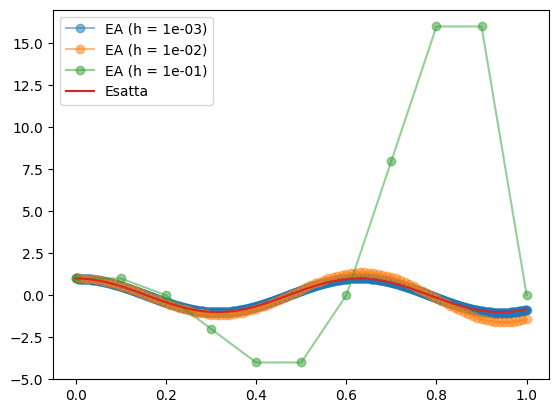

In [14]:
import matplotlib.pyplot as plt

for h in [1e-3, 1e-2, 1e-1]:
  t_h, u_h = eulero_avanti(f, t0, t_max, [x0, v0], h)
  plt.plot(t_h, u_h[:, 0], 'o-', alpha = 0.5, label = 'EA (h = %.0e)' % h)

tt = np.linspace(t0,t_max,100)
plt.plot(tt, u_ex(tt), label = 'Esatta')

plt.legend()

plt.show()

Osserviamo che il caso considerato è la versione vettoriale del problema modello, in cui si richiede che

$$
|1+\lambda h| < 1
$$

per ogni autovalore $\lambda$, che nel nostro caso risultano essere $\lambda = \pm i\omega = \pm 10i$, con $i$ unità immaginaria. La condizione non è quindi soddisfatta per alcun valore di $h$ e pertanto Eulero avanti per questo problema risulta sempre instabile. \\
Osserviamo di seguito la soluzione con tempo massimo $t_\text{max} = 100$ e $h=0.001$.

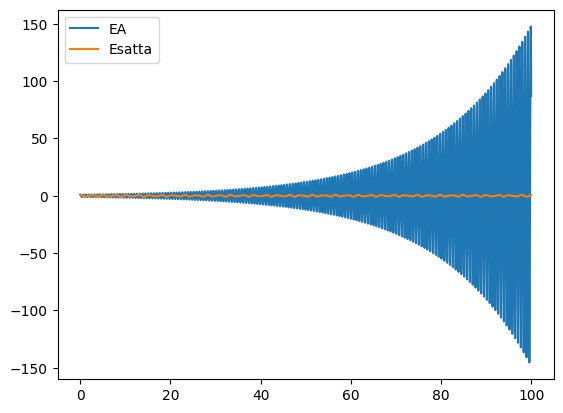

In [15]:
t_h, u_h = eulero_avanti(f, t0, 100, [x0, v0], 1e-3)

tt = np.linspace(t0, 100, 100)
plt.plot(t_h, u_h[:, 0], label = 'EA')
plt.plot(tt, u_ex(tt), label = 'Esatta')
plt.legend()
plt.show()

<mark>**Esercizio 2.3**</mark></br>

Si risolva il problema differenziale ottenuto con Eulero all'indietro. A tale scopo, si utilizzi la funzione $\verb|eulero_indietro_sis_lineari|$ che è stata opportunamente modificata in modo da gestire correttamente anche il caso vettoriale, sotto l'ipotesi che $\mathbf{f}$ sia rappresentabile attraverso una matrice. Si approssimi la soluzione per $t_0 = 0$, $t_\text{max} = 1$, $m=1$, $k=100$, $v_0=0$, $x_0=1$, $\gamma= 0$, $f_0=0$. Si confronti graficamente la soluzione esatta $x(t) = \cos(10t)$ con quella ottenuta ponendo $h=0.001$, $h= 0.01$ e $h=0.1$. Si commentino i risultati.

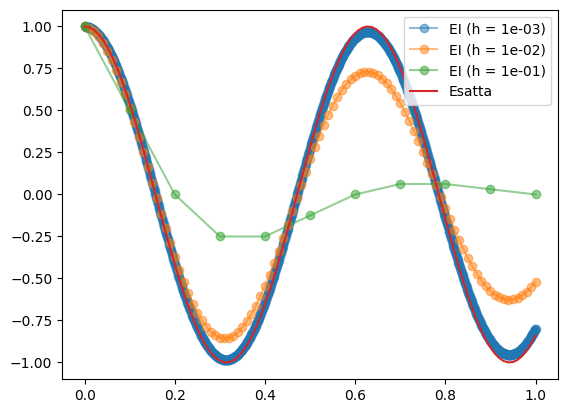

In [16]:
from utilities_ODE2 import eulero_indietro_sis_lineari

# Dati del problema
t0 = 0
t_max = 1
x0 = 1
v0 = 0
m = 1
k = 100
gamma = 0

# Soluzione esatta
u_ex = lambda t : np.cos(10*t)

A = np.array([[0, 1], [-k/m, -gamma/m]])

for h in [1e-3, 1e-2, 1e-1]:
  t_h, u_h = eulero_indietro_sis_lineari(A, t0, t_max, [x0, v0], h)
  plt.plot(t_h, u_h[:, 0], '-o', alpha = 0.5, label = 'EI (h = %.0e)' % h)

tt = np.linspace(t0, t_max, 100)
plt.plot(tt, u_ex(tt), label = 'Esatta')

plt.legend()
plt.show()

<mark>**Esercizio 2.4 (Per casa)**</mark></br>

Si ponga $t_0 = 0$, $t_\max = 10$, $m=1$, $k=4$, $v_0=1$, $x_0=0$.
</br></br>
Mediante la funzione RK45 di Python si sperimentino i seguenti casi, visualizzandone la soluzione numerica e discutendo i risultati ottenuti alla luce dei risultati teorici.

1. Oscillatore armonico semplice: $\gamma = f_0 = 0$.
La soluzione esatta è</br></br>
$$
x(t) = A\cos(\omega t+\theta_0),
$$
dove
$$
A = -\dfrac{v_0}{\sin(\theta_0)\omega}, \quad \theta_0 = \arctan\left( \dfrac{v_0}{\omega x_0} \right).
$$</br>

2. Oscillatore armonico sovra-smorzato: $f_0 = 0$, $\gamma^2 >4mk$. Si assuma $\gamma=5$.
La soluzione esatta è</br></br>
$$
x(t) = c_0 e^{\lambda_0 t} + c_1 e^{\lambda_1 t},
$$
dove</br></br>
$$
\lambda_{k}=\frac{-\gamma+(-1)^{k}\sqrt{\gamma^{2}-4mk}}{2m},\quad\quad c_{0}=x_{0}-c_{1},\quad\quad c_{1}=\frac{v_{0}-x_{0}\lambda_{0}}{\lambda_{1}-\lambda_{0}}
$$
</br>
3. Oscillatore armonico sotto-smorzato: $f_0 = 0$, $\gamma^2 < 4mk$. Si assuma $\gamma = 1$.
La soluzione esatta è</br></br>
$$
x(t) = e^{-\frac{\gamma}{2m}t}\left(A\cos(\omega_1 t)+B\sin(\omega_1 t)\right),
$$</br>
dove</br></br>
$$
\omega_1 = \dfrac{\sqrt{4mk-\gamma}}{2m}, \quad A=x_0, \quad B=\dfrac{v_0}{\omega_1} + \dfrac{\gamma x_0}{2m\omega_1}.
$$
</br>
4. Oscillatore armonico forzato: $\gamma=1$, $f_0=1$, $\Omega=0.5$. In questo caso si ponga $t_\max=30$.

In [17]:
# Visto che dovremo chiamare il metodo RK45 molte volte, può essere
# comodo costruire direttamente una function da chiamare di volta in volta:

def RungeKutta45(f, t0, y0, t_max, rtol, atol):
  """ Metodo di Runge-Kutta 45
  Input:
        f     (lambda function)      termine noto dell'ODE di primo ordine
        t0    (float)                tempo iniziale
        t_max (float)                tempo finale
        y0    (numpy.ndarray)        dato iniziale (vettore d-dimensionale)
        rtol  (float)                tolleranza relativa per RK45
        atol  (float)                tolleranza assoluta per RK45

  Output:
        t_h   (numpy.ndarray)        array degli istanti temporali discreti
        u_h   (numpy.ndarray)        soluzione discreta, salvata in un array len(t_h) x d
  """

  integratore = RK45(f, t0, y0, t_max, rtol=rtol, atol=atol)

  t_h = [t0]
  u_h = [y0]
  while integratore.t < t_max:
    integratore.step()
    t_h.append(integratore.t)
    u_h.append(integratore.y)

  return np.array(t_h), np.stack(u_h)

In [18]:
# E' anche utile costruire una function che, dati i parametri del problema,
# restituisca la lambda function descrivemente il termine di destra dell'equazione
# (così da non doverla definire tutte le volte...)

def get_f(k, m, gamma, f0, Omega):
  f = lambda t, y : [y[1], -k/m * y[0] - gamma/m * y[1] + f0/m * np.cos(Omega*t)]
  return f

In [19]:
# Dati comuni a tutti i problemi
t0, t_max = 0, 10

x0, v0 = 0, 1

m = 1
k = 4

Omega = 0

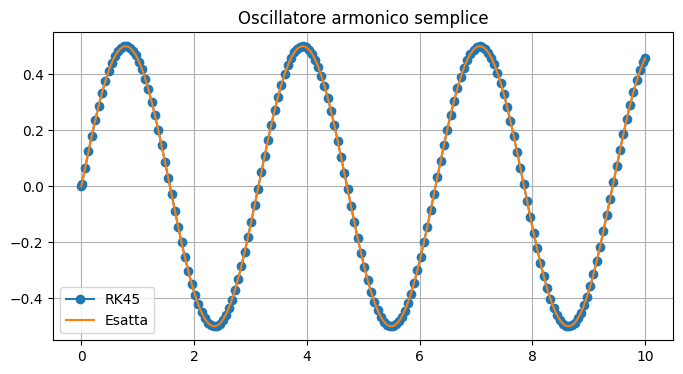

In [20]:
# Caso 1: Oscillatore armonico semplice

# Dati del problema
gamma = 0
omega = np.sqrt(k/m)
f0 = 0

# Soluzione esatta
theta0 = np.pi/2.0 # arctan(v0/(omega*x0)), ma qui x0 è 0 -> pi/2

yex = lambda t : -v0/(omega * np.sin(theta0)) * np.cos(omega*t + theta0)

# RHS del sistema
f = get_f(k, m, gamma, f0, Omega)

t_h, u_h = RungeKutta45(f, t0, [x0, v0], t_max, 1e-8, 1e-8)

plt.figure(figsize = (8, 4))
plt.plot(t_h, u_h[:,0], 'o-', label = 'RK45')

tt = np.linspace(t0, t_max, 1000)
plt.plot(tt, yex(tt), label = 'Esatta')
plt.grid()
plt.legend()
plt.title('Oscillatore armonico semplice')
plt.show()

# Salviamo la soluzione per esercizio extra
soluzione = dict()
soluzione['semplice'] = u_h

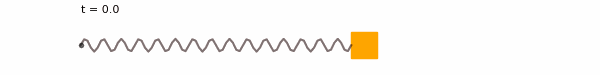

In [21]:
import spring
spring.animate(t_h, u_h[:, 0])

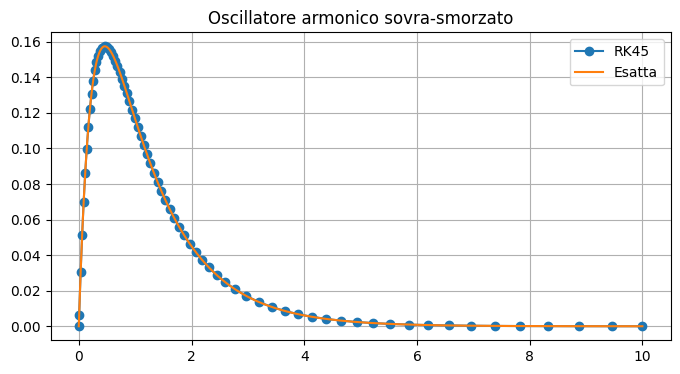

In [22]:
# Caso 2: Oscillatore armonico sovra-smorzato

# Dati del problema
gamma = 5
omega = np.sqrt(k/m)
f0 = 0

# sSoluzione esatta
lambda1 = (-gamma + np.sqrt(gamma**2 - 4*m*k)) / (2*m)
lambda2 = (-gamma - np.sqrt(gamma**2 - 4*m*k)) / (2*m)

c1 = (v0 - x0*lambda1) / (lambda2 - lambda1)
c0 = x0 - c1

yex = lambda t : c0 * np.exp(lambda1 * t) + c1 * np.exp(lambda2 * t)

# RHS del sistema
f = get_f(k, m, gamma, f0, Omega)

t_h, u_h = RungeKutta45(f, t0, [x0, v0], t_max, 1e-8, 1e-8)

plt.figure(figsize = (8, 4))
plt.plot(t_h, u_h[:,0], 'o-', label = 'RK45')

tt = np.linspace(t0, t_max, 1000)
plt.plot(tt, yex(tt), label = 'Esatta')
plt.grid()
plt.legend()
plt.title('Oscillatore armonico sovra-smorzato')
plt.show()

# salvo la soluzione per esercizio extra
soluzione['sovra-smorzato'] = u_h

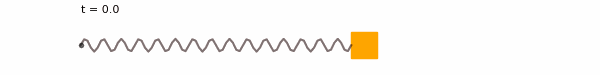

In [23]:
import spring
spring.animate(t_h, u_h[:, 0])

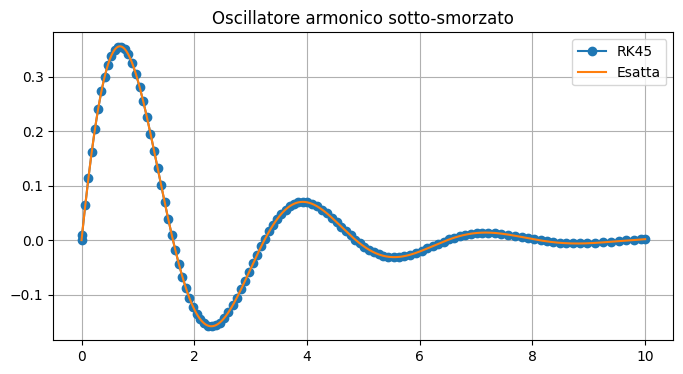

In [24]:
# Caso 3: Oscillatore armonico sotto-smorzato

# Dati del problema
gamma = 1
omega = np.sqrt(k/m)
f0 = 0

# Soluzione esatta
omega1 = np.sqrt(4*m*k - gamma) / (2*m)
A = x0
B = v0/omega1 + (gamma*x0) / (2*m*omega1)

yex = lambda t : np.exp(-gamma / (2*m) * t) * (A*np.cos(omega1*t) + B*np.sin(omega1*t))

# RHS del sistema
f = get_f(k, m, gamma, f0, Omega)

t_h, u_h = RungeKutta45(f, t0, [x0, v0], t_max, 1e-8, 1e-8)

plt.figure(figsize = (8, 4))
plt.plot(t_h, u_h[:,0], 'o-', label = 'RK45')

tt = np.linspace(t0, t_max, 1000)
plt.plot(tt, yex(tt), label = 'Esatta')
plt.grid()
plt.legend()
plt.title('Oscillatore armonico sotto-smorzato')
plt.show()

# salvo la soluzione per l'esercizio extra
soluzione['sotto-smorzato'] = u_h

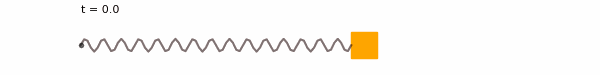

In [25]:
import spring
spring.animate(t_h, u_h[:, 0])

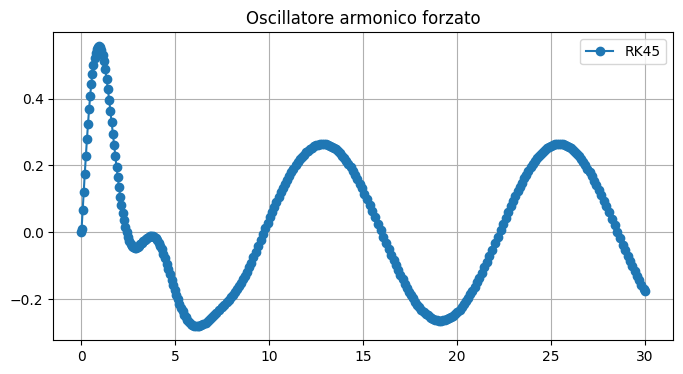

In [26]:
# Caso 4: Oscillatore armonico forzato

# dati del problema
t_max = 30
gamma = 1
omega = np.sqrt(k/m)
f0 = 1
Omega = 0.5

# RHS del sistema
f = get_f(k, m, gamma, f0, Omega)

t_h, u_h = RungeKutta45(f, t0, [x0, v0], t_max, 1e-8, 1e-8)

plt.figure(figsize = (8, 4))
plt.plot(t_h, u_h[:,0], 'o-', label = 'RK45')

plt.grid()
plt.legend()
plt.title('Oscillatore armonico forzato')
plt.show()

# salvo la soluzione per l'esercizio extra
soluzione['forzato'] = u_h

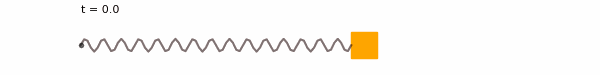

In [27]:
import spring
spring.animate(t_h, u_h[:, 0])

<mark>**Extra!**</mark></br>

Confrontare le soluzioni numeriche ottenute nell'Esercizio 2.4, rappresentandole nel piano delle fasi, cioè nel piano posizione-velocità, $(x,\dot{x})$.

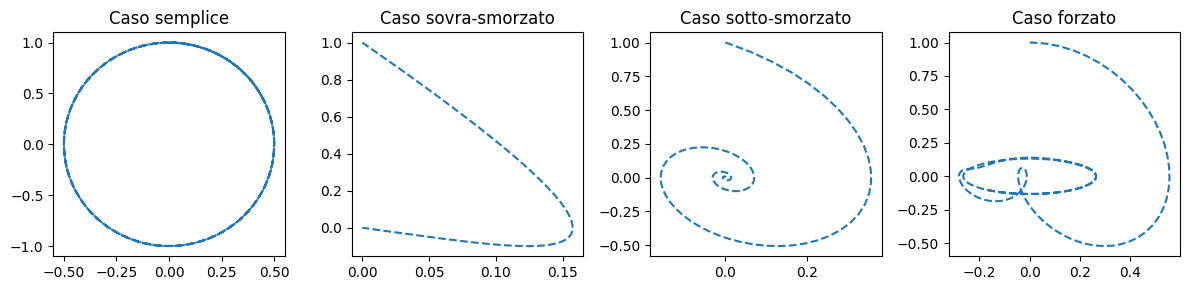

In [28]:
plt.figure(figsize = (12,3))

casi = soluzione.keys()

for i,caso in enumerate(casi):
  plt.subplot(1,4,i+1)
  x = soluzione[caso][:,0]
  v = soluzione[caso][:,1]
  plt.plot(x,v,'--')
  plt.title('Caso %s' % caso)

plt.tight_layout()
plt.show()